## CS 229 – Problem Set 3 
### Question 5: K-means for Compression [20 points]

Complete problem description can be found [here](https://github.com/ccombier/stanford-CS229/blob/master/Problem3/ps3.pdf)

**General Overview** <br>
We want to apply the K-means algorithm to image compression, by reducing the number of colors used in an image. Each image is represented as by pixels, with each pixel having 3 values corresponding to the red-blue-green components. What we aim to compress is the number of colors or sets of distinct rgb pixels in the image. Thus, we will use K-means to cluster pixels into 16 different sets of colors with the distance metric being defined as the norm between 3d rgb vectors.  

<u>Image files</u>
- *mandrill-small.tiff*
- *mandrill-large.tiff*


**Status**: Complete

### (a) Display mandrill-large

In [2]:
from matplotlib.image import imread; import matplotlib.pyplot as plt
import numpy as np

In [3]:
A = imread('mandrill-large.tiff')

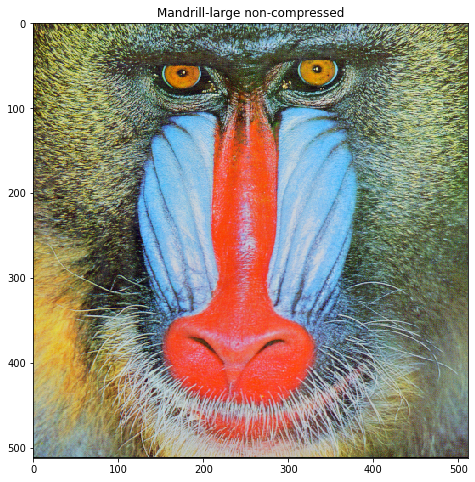

In [93]:
#plt.imshow(A);
plt.figure(figsize=(8,8))
plt.title(label="Mandrill-large non-compressed")
plt.imshow(A)

### (b) Run k-means on mandrill-small 
Store the eventual cluster centroids for later use 


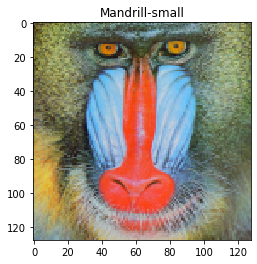

In [5]:
B = imread('mandrill-small.tiff')
plt.imshow(B);
plt.title(label="Mandrill-small")
plt.show()

In [32]:
#convert image into vector 
data = np.resize(B,(B.shape[0]*B.shape[1],B.shape[2]))

In [106]:
#run k-means
c,a,e = k_means(initialize,16,data,d_metric)

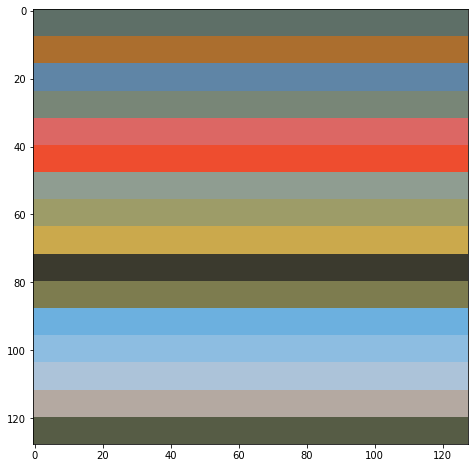

In [99]:
#show color map
import matplotlib.pyplot as plt
from matplotlib.image import imread
#make color map
centroids = c.astype(int)
colormap = np.repeat(centroids,1024,0).reshape(128,128,3)
plt.figure(figsize=(8,8))
plt.imshow(colormap);

--- 

### K-means Code

In [104]:
# Run k-means using the initialization function to intialize the centroids, 
# with k as the number of centroids on the data, to a maximium number of iterations 
# or once it converges within one tol. 
# d_metric – distance metric to be used to test convergence 

# Returns – array of cluster centroids  
def k_means(initialize,k,image,d_metric,min_it=30,tol=0.01):
 
    #initialize
    centroids = initialize(k,data)
    assignments = np.zeros(data.shape[0]).astype('int')
    
    converged = False 
    itr = 0 
    err = [1e16]
    d = 0
    while (not converged or itr < min_it):
        itr+=1 ; 
        
        assignments = c_step(centroids,data,k)
        centroids = u_step(assignments,data,k)
        
        d = d_metric(centroids,assignments,data)
        prev = np.array(err)[-1] 
        err.append(d)
        if prev-d < tol: 
            converged = True   
        if itr > 100:
            print("Broken")
            break 
    return centroids,assignments,err   
    

In [105]:
#initialize k centroids by choosing k points randomly from the data
def initialize(k,data):
    rdms = np.random.choice(np.arange(data.shape[0]),k,replace=False)
    centroids = []
    for i in rdms:
        centroids.append(data[i])
    return np.array(centroids)
                            
def d_metric(centroid,assignment,param):
    s=0 
    for i in range(assignment.shape[0]):
        s+= (np.linalg.norm(data[i]-centroid[assignment[i]],2)**2)
    return s/assignment.shape[0]

In [74]:

#assign each datapoint to a cluster based on
def c_step(centroid,data,k): 
    a = np.zeros(data.shape[0]).astype('int')
    for i in range(data.shape[0]):
        x_i = data[i]
        dist = np.linalg.norm(np.subtract(x_i, centroid),axis=1)
        a[i] = np.argmin(dist) 
    
    return a

#move u to the mean of the cluster 
def u_step(assignment,data,k):
    c = np.zeros((k,data.shape[1]))
    for j in range(k):
        s = np.zeros(data.shape[1]); ind = np.where(assignment==j,1,0) 
        for i,val in np.ndenumerate(ind): 
            s+= (val*data[i]) #check
        if np.sum(ind) == 0:
            c[j] = data[np.random.choice(np.arange(data.shape[0]),1)]
        else: 
            c[j] = (s/np.sum(ind)) 
        
    return c


--- 

### (c) Compress large image

In [100]:
#compress large image 
centroids = c
A_mod = A.copy()

for i in range(A_mod.shape[0]):
    for j in range(A_mod.shape[1]):
        x_i = A_mod[i][j]
        dist = np.linalg.norm(np.subtract(x_i, centroids),axis=1) 
        A_mod[i][j] = centroids[np.argmin(dist)]

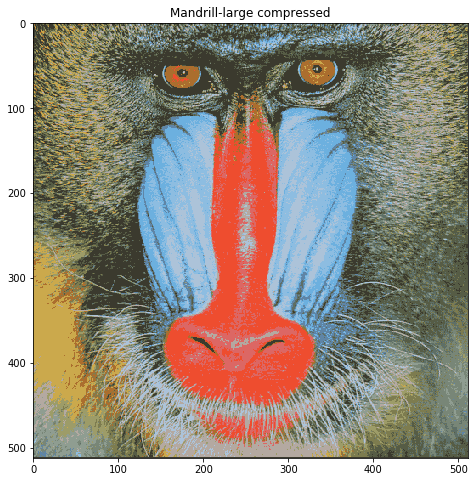

In [101]:
plt.figure(figsize=(8,8))
plt.title(label="Mandrill-large compressed")
plt.imshow(A_mod);

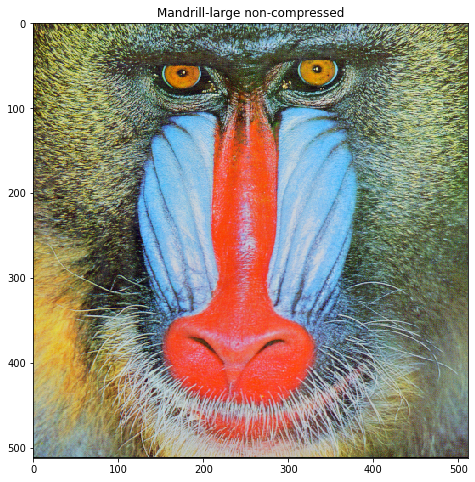

In [102]:
#for comparison
plt.figure(figsize=(8,8))
plt.title(label="Mandrill-large non-compressed")
plt.imshow(A)